In [16]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, BatchNormalization
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [17]:
df=pd.read_csv("TSLA.csv")
df.shape
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,04/27/20,147.522003,159.897995,147.000000,159.750000,159.750000,103407000
1,04/28/20,159.128006,161.000000,151.337997,153.824005,153.824005,76110000
2,04/29/20,158.033997,160.639999,156.632004,160.102005,160.102005,81080000
3,04/30/20,171.037994,173.964005,152.699997,156.376007,156.376007,142359500
4,05/01/20,151.000000,154.554001,136.608002,140.264008,140.264008,162659000


In [18]:
training_set = df.iloc[:251, 1:2].values
test_set = df.iloc[251:, 1:2].values

In [19]:
df.iloc[:251, 1:2].head()

,Open
0,147.522003
1,159.128006
2,158.033997
3,171.037994
4,151.000000


In [20]:
df.shape

(251, 7)

In [21]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 251):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape


(191, 60, 1)

In [7]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs =25, batch_size = 32)

Epoch 1/25
6/6 [==============================] - 36s 19ms/step - loss: 0.2538
Epoch 2/25
6/6 [==============================] - 0s 19ms/step - loss: 0.0757
Epoch 3/25
6/6 [==============================] - 0s 16ms/step - loss: 0.0534
Epoch 4/25
6/6 [==============================] - 0s 15ms/step - loss: 0.0226
Epoch 5/25
6/6 [==============================] - 0s 14ms/step - loss: 0.0241
Epoch 6/25
6/6 [==============================] - 0s 13ms/step - loss: 0.0186
Epoch 7/25
6/6 [==============================] - 0s 13ms/step - loss: 0.0170
Epoch 8/25
6/6 [==============================] - 0s 14ms/step - loss: 0.0177
Epoch 9/25
6/6 [==============================] - 0s 16ms/step - loss: 0.0142
Epoch 10/25
6/6 [==============================] - 0s 12ms/step - loss: 0.0165
Epoch 11/25
6/6 [==============================] - 0s 12ms/step - loss: 0.0151
Epoch 12/25
6/6 [==============================] - 0s 14ms/step - loss: 0.0149
Epoch 13/25
6/6 [==============================] - 0s 14ms/s

In [22]:
X_train.shape

(191, 60, 1)

In [23]:
y_train.shape


(191,)

In [25]:
# Getting the predicted stock 
dataset_train = df.iloc[:200, 1:2]
dataset_test = df.iloc[200:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 50:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(50, 101):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(51, 50, 1)


In [26]:
dataset_train.shape

(200, 1)

In [27]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

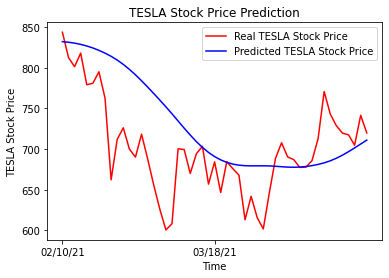

In [28]:
# Visualising the results
plt.plot(df.loc[200:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[200:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,50,25))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()